In [10]:
learning_rate = 0.01
training_epochs = 40

In [11]:
trX = np.linspace(-1,1,101)
num_coeffs = 6
trY_coeffs = [1,2,3,4,5,6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

trY += np.random.randn(*trX.shape) * 1.5

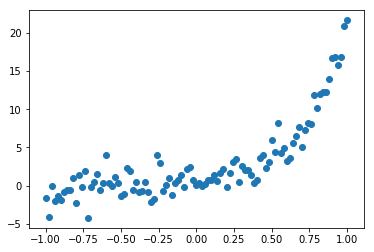

In [12]:
plt.scatter(trX, trY)
plt.show()

In [15]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [16]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [17]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

In [18]:
cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)

[ 0.60593641  1.8480742   4.52101612  4.57404947  4.18824768  5.20706463]


In [22]:
sess.close()

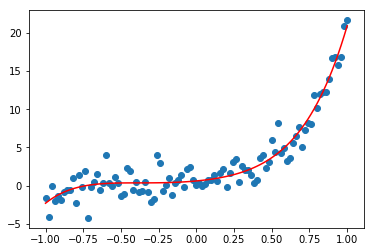

In [23]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()